# Projet de prédiction sur la consommation éléctrique en IDF

#### Source des données

Les données sont disponibles sur le site de la RTE au format annuel, une donnée toutes les 15min : <https://www.rte-france.com/fr/eco2mix/eco2mix-telechargement>

#### Prédiction sur une série temporelle

Le but d'une prédiction sur une série temporelle est de prolonger les phénomènes de :

- tendance
- saison
- bruit
- vacance

#### Nettoyage des données

Déjà fait!

- valeurs manquantes
- valeurs abérrantes
- génération de colonnes

#### Utilisation de pandas (dataset) et fbprohet (ml)

Nous allons utiliser deux modules python très utilisés dans le monde de la donnée :

- <https://pandas.pydata.org/>
- <https://facebook.github.io/prophet/docs/quick_start.html>

---

## Etape 1

Il faut commencer par importer les librairies : 

> Executez la cellule suivante :

In [8]:
import pandas as pd
from fbprophet import Prophet

---

## Etape 2

Vous allez maintenant importer le fichier csv des données nettoyé. Il va falloir téléverser (=uploader:) ce fichier sur le serveur (avec votre nom, puisque tout le monde partage le même espace)

> Puis executez la cellule suivante :

In [9]:
df = pd.read_csv('rte.csv')
df.head()

,ds,y
0,2018-03-01 00:00:00,13286
1,2018-03-01 00:30:00,13050
2,2018-03-01 01:00:00,12532
3,2018-03-01 01:30:00,12133
4,2018-03-01 02:00:00,11809


---

## Etape 3

Vous allez pouvoir utiliser facebookprophet sur le dataframe précédent (df).
Réglez le nombre de périodes (en heure) pour faire une prédiction sur 5 jours (combien d'heures dans 5 jours?)

> Puis executez la cellule suivante (c'est un peu long..):

Vous recevez un avertissement, modifiez la 1ère ligne en `Prophet(changepoint_prior_scale=0.01, weekly_seasonality=True).fit(df)` pour prendre en compte la saisonnalité hébdomadaire.

> Executez à nouveau la cellule suivante (c'est un peu long..):

In [10]:
m = Prophet(changepoint_prior_scale=0.01, weekly_seasonality=True).fit(df)
future = m.make_future_dataframe(periods=72, freq='H')
fcst = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


---

## Etape 4

Tracez la figure et observez comment votre modèle se comporte sur les données passées, et s'il prolonge correctement la série sur les 5 jours suivants.

> Executez la cellule suivante :

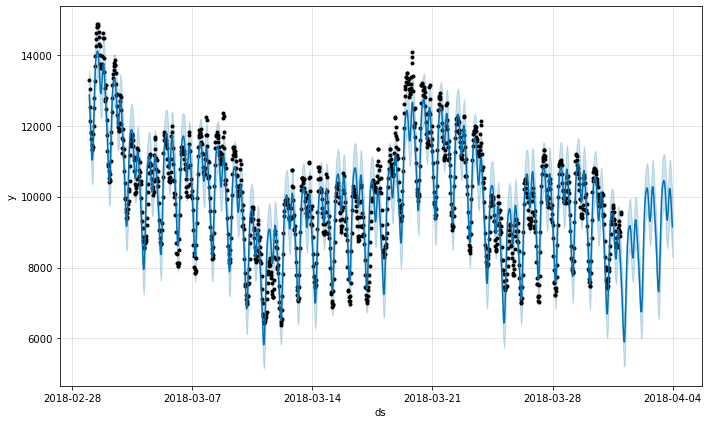

In [11]:
fig = m.plot(fcst)

In [ ]:
print(fcst)